# Assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [17]:
import pandas as pd
import numpy as np

pokémon = pd.read_csv('pokemon.csv', sep=',')
pokémon = pokémon.dropna() #Deze is erg belangrijk omdat je alle rijen waar een lege waarde in zit wilt verwijderen.

from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

from sklearn.model_selection import train_test_split

pokémon.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.128957,0.109955,0.105918,0.090547,0.065748,0.084785,0.068507,0.983625,0.201582
Total,0.128957,1.000000,0.669066,0.754465,0.598596,0.746982,0.691391,0.561656,0.063254,0.511054
HP,0.109955,0.669066,1.000000,0.518707,0.248920,0.456355,0.328665,0.271853,0.069728,0.368597
Attack,0.105918,0.754465,0.518707,1.000000,0.401001,0.408570,0.257964,0.403546,0.058433,0.359763
Defense,0.090547,0.598596,0.248920,0.401001,1.000000,0.196778,0.528286,-0.030993,0.040160,0.199898
Sp. Atk,0.065748,0.746982,0.456355,0.408570,0.196778,1.000000,0.480027,0.435450,0.018942,0.474865
Sp. Def,0.084785,0.691391,0.328665,0.257964,0.528286,0.480027,1.000000,0.208259,0.036356,0.354490
Speed,0.068507,0.561656,0.271853,0.403546,-0.030993,0.435450,0.208259,1.000000,0.039029,0.305780
Generation,0.983625,0.063254,0.069728,0.058433,0.040160,0.018942,0.036356,0.039029,1.000000,0.130808
Legendary,0.201582,0.511054,0.368597,0.359763,0.199898,0.474865,0.354490,0.305780,0.130808,1.000000


#### Split your dataset into a train (70%) and test (30%) set.

In [18]:
train, test = train_test_split(pokémon, test_size=0.3, random_state=42, stratify=pokémon['Type 1'])
print(train.shape, test.shape)

(289, 13) (125, 13)


#### Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.

In [19]:
features= ['Attack']
dt_regression = DecisionTreeRegressor(max_depth = 3)
dt_regression.fit(train[features], train['HP'])

DecisionTreeRegressor(max_depth=3)

#### Calculate the RMSE for both the train set predictions and test set predictions.

In [20]:
predictionsOnTrainset = dt_regression.predict(train[features])
predictionsOnTestset = dt_regression.predict(test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, train.HP)
rmseTest = calculate_rmse(predictionsOnTestset, test.HP)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 19.03317816142093
RMSE on test set 19.631965501371994


#### Is the accurracy different? Did you expect this difference?

Er is eigenlijk vrij weinig verschil end dat is ook wat ik had verwacht omdat een pokémon kwa kracht ook de health points meer worden. Ik had ook niet verwacht dat de twee sets erg van elkaar zouden verschillen.

#### Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

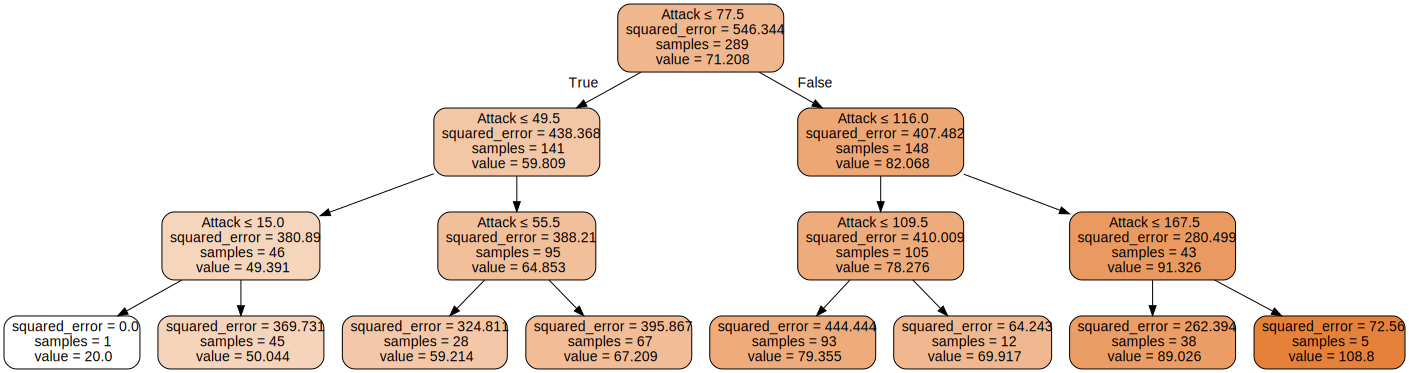

In [21]:
plot_tree_regression(dt_regression, features)